# Battle of the Neighborhoods
### Finding (WHAT, EXACTLY?) the best Neighbourhood in ~~Toronto~~ Vancouver using Data Science

# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references) >>> add

https://en.wikipedia.org/wiki/Vancouver

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V

In [1]:
import requests
import os
import pandas as pd
import numpy as np
import json

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from bs4 import BeautifulSoup

import matplotlib.cm as cm
import matplotlib.colors as colors

# from sklearn.cluster import KMeans ######### imported later

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


&rarr; First, find the postal codes and the names of all of Vancouver's neighborhoods.

Postal codes beginning with V are located within the Canadian province of British Columbia, where Vancouver is located. So I will start my data mining by scraping the wikipedia page Canada's postal codes with 'V'.

In [2]:
# retrieve the URL and create a BeautifulSoup object
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V'
bc_wiki = requests.get(url)
soup = BeautifulSoup(bc_wiki.content, "lxml")

table = soup.find_all('table')[0]
df = pd.read_html(str(table))
bc_data = pd.DataFrame(df[0])
bc_data.rename(columns={'Postcode': 'PostalCode', 'Borough': 'Borough', 'Neighbourhood': 'Neighborhood'}, inplace=True)
print(bc_data.shape)
bc_data

(20, 9)


,0,1,2,3,4,5,6,7,8
0,V1AKimberley,V2APenticton,V3ALangley Township(Langley City),V4ASurreySouthwest,V5ABurnaby(Government Road / Lake City / SFU /...,V6AVancouver(Strathcona / Chinatown / Downtown...,V7ARichmondSouth,V8APowell River,V9AVictoria(Vic West / Esquimalt)Canadian Forc...
1,V1BVernonEast,V2BKamloopsNorthwest,V3BPort CoquitlamCentral,V4BWhite Rock,V5BBurnaby(Parkcrest-Aubrey / Ardingley-Sprott),V6BVancouver(NE Downtown / Gastown / Harbour C...,V7BRichmond(Sea Island / YVR),V8BSquamish,V9BVictoria(West Highlands / North Langford / ...
2,V1CCranbrook,V2CKamloopsCentral and Southeast,V3CPort CoquitlamSouth,V4CDeltaNortheast,V5CBurnaby(Burnaby Heights / Willingdon Height...,V6CVancouver(Waterfront / Coal Harbour / Canad...,V7CRichmondNorthwest,V8CKitimat,V9CVictoria(Colwood / South Langford / Metchosin)
3,V1ESalmon Arm,V2EKamloopsSouth and West,V3ECoquitlamNorth,V4EDeltaEast,V5EBurnaby(Lakeview-Mayfield / Richmond Park /...,V6EVancouver(SE West End / Davie Village),V7ERichmondSouthwest,V8EWhistler,V9EVictoria(East Highlands / NW Saanich)
4,V1GDawson Creek,V2GWilliams Lake,V3GAbbotsfordEast,V4GDeltaEast Central,V5GBurnaby(Cascade-Schou / Douglas-Gilpin),V6GVancouver(NW West End / Stanley Park),V7GNorth Vancouver (district municipality)Oute...,V8GTerrace,V9GLadysmith
5,V1HVernonWest,V2HKamloopsNorth,V3HPort Moody,V4HNot assigned,V5HBurnaby(Maywood / Marlborough / Oakalla / W...,V6HVancouver(West Fairview / Granville Island ...,V7HNorth Vancouver (district municipality)Inne...,V8HNot assigned,V9HCampbell RiverOutskirts
6,V1JFort St. John,V2JQuesnel,V3JCoquitlamNorth,V4JNot assigned,V5JBurnaby(Suncrest / Sussex-Nelson / Clinton-...,V6JVancouver(NW Shaughnessy / East Kitsilano /...,V7JNorth Vancouver (district municipality)East...,V8JPrince Rupert,V9JCourtenayNorthern Outskirts
7,V1KMerritt,V2KPrince GeorgeNorth,V3KCoquitlamSouth,V4KDeltaNorthwest,V5KVancouver(North Hastings-Sunrise),V6KVancouver(Central Kitsilano / Greektown),V7KNorth Vancouver (district municipality)Nort...,V8KSalt Spring Island,V9KQualicum Beach
8,V1LNelson,V2LPrince GeorgeEast Central,V3LNew WestminsterNortheast,V4LDeltaSoutheast,V5LVancouver(North Grandview-Woodland),V6LVancouver(NW Arbutus Ridge / NE Dunbar-Sout...,V7LNorth Vancouver (city)South Central,V8LSidney(North Saanich / YYJ),V9LDuncan
9,V1MLangley TownshipNorth,V2MPrince GeorgeWest Central,V3MNew WestminsterSouthwest(Includes Annacis I...,V4MDeltaSouthwest,V5MVancouver(South Hastings-Sunrise / North Re...,V6MVancouver(South Shaughnessy / NW Oakridge /...,V7MNorth Vancouver (city)Southwest Central,V8MCentral Saanich,V9MComox


In [3]:
### create one list for each column of bc_data
zero = bc_data[0].tolist()
one = bc_data[1].tolist()
two = bc_data[2].tolist()
three = bc_data[3].tolist()
four = bc_data[4].tolist()
five = bc_data[5].tolist()
six = bc_data[6].tolist()
seven = bc_data[7].tolist()
eight = bc_data[8].tolist()

In [5]:
### concatenate all lists and convert to pd.Series
bc_series = pd.Series([zero, one, two, three, four, five, six, seven, eight])
bc_series = bc_series.sum()
### convert Series to DataFrame
bc_df = pd.DataFrame(bc_series)
bc_df

,0
0,V1AKimberley
1,V1BVernonEast
2,V1CCranbrook
3,V1ESalmon Arm
4,V1GDawson Creek
...,...
175,V9VNanaimoNorthwest
176,V9WCampbell RiverCentral
177,V9XNanaimo(Cedar)
178,V9YPort Alberni


In [6]:
### split data into 2 columns: PostalCode, City-Neighborhood
bc_df['PostalCode'] = bc_df[0].str[:3]
bc_df['City-Neighborhood'] = bc_df[0].str[3:]
bc_df.head()

,0,PostalCode,City-Neighborhood
0,V1AKimberley,V1A,Kimberley
1,V1BVernonEast,V1B,VernonEast
2,V1CCranbrook,V1C,Cranbrook
3,V1ESalmon Arm,V1E,Salmon Arm
4,V1GDawson Creek,V1G,Dawson Creek


In [7]:
### create a subdf with Vancouver's data only
vancouver_df = bc_df[bc_df['City-Neighborhood'].str.startswith('Vancouver')]
print(vancouver_df.shape)
vancouver_df.head()

(31, 3)


,0,PostalCode,City-Neighborhood
87,V5KVancouver(North Hastings-Sunrise),V5K,Vancouver(North Hastings-Sunrise)
88,V5LVancouver(North Grandview-Woodland),V5L,Vancouver(North Grandview-Woodland)
89,V5MVancouver(South Hastings-Sunrise / North Re...,V5M,Vancouver(South Hastings-Sunrise / North Renfr...
90,V5NVancouver(South Grandview-Woodland / NE Ken...,V5N,Vancouver(South Grandview-Woodland / NE Kensin...
91,V5PVancouver(SE Kensington-Cedar Cottage / Vic...,V5P,Vancouver(SE Kensington-Cedar Cottage / Victor...


In [8]:
### split City-Neighborhood into 2 columns, named City and Neighborhood
vancouver_df[['City', 'Neighborhood']] = vancouver_df['City-Neighborhood'].str.split('(', expand=True)
### remove the ending ')' from 'Neighborhood' column
vancouver_df['Neighborhood'] = vancouver_df['Neighborhood'].str[:-1]
### reset index and drop columns with repeated data
vancouver_df.drop(columns=[0, 'City-Neighborhood'], inplace=True)
vancouver_df.head()

/home/alina/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/alina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/alina/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

,PostalCode,City,Neighborhood
87,V5K,Vancouver,North Hastings-Sunrise
88,V5L,Vancouver,North Grandview-Woodland
89,V5M,Vancouver,South Hastings-Sunrise / North Renfrew-Colling...
90,V5N,Vancouver,South Grandview-Woodland / NE Kensington-Cedar...
91,V5P,Vancouver,SE Kensington-Cedar Cottage / Victoria-Fraserview


In [9]:
### to avoid problems with SettingWithCopyWarning, I deep copy the df before reseting the index
vancouver_data = vancouver_df.copy()
vancouver_data.reset_index(drop=True, inplace=True)
vancouver_data

,PostalCode,City,Neighborhood
0,V5K,Vancouver,North Hastings-Sunrise
1,V5L,Vancouver,North Grandview-Woodland
2,V5M,Vancouver,South Hastings-Sunrise / North Renfrew-Colling...
3,V5N,Vancouver,South Grandview-Woodland / NE Kensington-Cedar...
4,V5P,Vancouver,SE Kensington-Cedar Cottage / Victoria-Fraserview
5,V5R,Vancouver,South Renfrew-Collingwood
6,V5S,Vancouver,Killarney
7,V5T,Vancouver,East Mount Pleasant
8,V5V,Vancouver,West Kensington-Cedar Cottage / NE Riley Park-...
9,V5W,Vancouver,SE Riley Park-Little Mountain / SW Kensington-...


Now that I have Vancouver's postal codes and neighborhood names, let's find the coordinates with geocoder:

EXPLAIN HOW I FOUND ALL THE GEOLOCATION DATA

In [ ]:
postal_codes = ['V5K', 'V5L', 'V5M', 'V5N', 'V5P', 'V5R',
                'V5S', 'V5T', 'V5V', 'V5W', 'V5X', 'V5Y',
                'V5Z', 'V6A', 'V6B', 'V6C', 'V6E', 'V6G',
                'V6H', 'V6J', 'V6K', 'V6L', 'V6M', 'V6N',
                'V6P', 'V6R', 'V6S', 'V6T', 'V6Z', 'V7X', 'V7Y']

In [ ]:
latitude = [49.28327692992457, 49.27985324214888, 49.2653580677758, 49.25925375085778, 49.23066769612333, 49.24063680490001,
            49.22175399240329, 49.264724451943785, 49.25156523762483, 49.236264461735814, 49.21514467045678, 49.25201526564356,
            49.260879569058794, 49.281138329348636, 49.280718454113824, 49.28727754578737, 49.28422045264578, 49.29092594034838,
            49.25799774050024, 49.262053516608404, 49.26648330869385, 49.25310953498545, 49.23630274346183, 49.2371832176151,
            49.214390822344754, 49.26688560987094, 49.25120988008219, 49.27126808428649, 49.27588523874305, 49.28596658609673, 49.28218206665508]

In [ ]:
longitude = [-123.04329271829529, -123.06827660204843, -123.04911872950036, -123.072063099059, -123.07184266792716, -123.04175361008751,
             -123.04294548573618, -123.09257386008586, -123.0929621873012, -123.10332776576216, -123.10317812883694, -123.11074779451818,
             -123.1218084558727, -123.09542483761334, -123.1141689234957, -123.1155077625037, -123.13132647887186, -123.14090375789006,
             -123.13176101715264, -123.14929629231642, -123.17318480044347, -123.17428149259355, -123.14714057838971, -123.1857490833099,
             -123.14904062028786, -123.21047318497928, -123.22541802262631, -123.23926940900262, -123.13172470324018, -123.11953099301677, -123.11924656130608]

In [ ]:
df = pd.DataFrame(list(zip(postal_codes, latitude, longitude)), columns=['PostalCode', 'Latitude', 'Longitude'])
df.to_csv('Vancouver_coordinates.csv', index=False)

In [10]:
# create dataframe with coordinates data for Vancouver's neighborhoods
vancouver_coord = pd.read_csv('Vancouver_coordinates.csv')
vancouver_coord.head()

,PostalCode,Latitude,Longitude
0,V5K,49.283277,-123.043293
1,V5L,49.279853,-123.068277
2,V5M,49.265358,-123.049119
3,V5N,49.259254,-123.072063
4,V5P,49.230668,-123.071843


In [11]:
# merge dataframes
neighborhoods = vancouver_data.merge(vancouver_coord, how='inner', on='PostalCode')
neighborhoods

,PostalCode,City,Neighborhood,Latitude,Longitude
0,V5K,Vancouver,North Hastings-Sunrise,49.283277,-123.043293
1,V5L,Vancouver,North Grandview-Woodland,49.279853,-123.068277
2,V5M,Vancouver,South Hastings-Sunrise / North Renfrew-Colling...,49.265358,-123.049119
3,V5N,Vancouver,South Grandview-Woodland / NE Kensington-Cedar...,49.259254,-123.072063
4,V5P,Vancouver,SE Kensington-Cedar Cottage / Victoria-Fraserview,49.230668,-123.071843
5,V5R,Vancouver,South Renfrew-Collingwood,49.240637,-123.041754
6,V5S,Vancouver,Killarney,49.221754,-123.042945
7,V5T,Vancouver,East Mount Pleasant,49.264724,-123.092574
8,V5V,Vancouver,West Kensington-Cedar Cottage / NE Riley Park-...,49.251565,-123.092962
9,V5W,Vancouver,SE Riley Park-Little Mountain / SW Kensington-...,49.236264,-123.103328


In [12]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Vancouver, BC, Canada'

geolocator = Nominatim(user_agent="vancouver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of the city of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of the city of Vancouver are 49.2608724, -123.1139529.


In [13]:
print('The dataframe has {} postal codes.'.format(len(neighborhoods['Neighborhood'].unique()))) # @@@@@@@@@@@@@@@@@@@@@@

The dataframe has 31 postal codes.


In [14]:
# create map of Buenos Aires using latitude and longitude values
map_vancouver = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], 
                                  neighborhoods['Longitude'],
                                  neighborhoods['Neighborhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='lightgreen',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)

map_vancouver

## Explore Neighborhoods in Vancouver

In [15]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'OC30BIT0T1C1DAJAXAUJGG1H3MQ1XOOZULL5ZWMARRVZFR0K' # your Foursquare ID
CLIENT_SECRET = 'NGO53AGQLJYHRMVAADNXU2QXJX1SLPK5M3HSMNTOWZQUMJZY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    """ names, latitudes, longitudes are columns from a dataframe. """
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude',
                  'Neighborhood Longitude',
                  'Venue',
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
# Run the above function on each neighborhood and create a new dataframe called ba_venues.
vancouver_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                            latitudes=neighborhoods['Latitude'],
                            longitudes=neighborhoods['Longitude'])

North Hastings-Sunrise
North Grandview-Woodland
South Hastings-Sunrise / North Renfrew-Collingwood
South Grandview-Woodland / NE Kensington-Cedar Cottage
SE Kensington-Cedar Cottage / Victoria-Fraserview
South Renfrew-Collingwood
Killarney
East Mount Pleasant
West Kensington-Cedar Cottage / NE Riley Park-Little Mountain
SE Riley Park-Little Mountain / SW Kensington-Cedar Cottage / NE Oakridge / North Sunset
SE Oakridge / East Marpole / South Sunset
West Mount Pleasant / West Riley Park-Little Mountain
East Fairview / South Cambie
Strathcona / Chinatown / Downtown Eastside
NE Downtown / Gastown / Harbour Centre / International Village / Victory Square / Yaletown
Waterfront / Coal Harbour / Canada Place
SE West End / Davie Village
NW West End / Stanley Park
West Fairview / Granville Island / NE Shaughnessy
NW Shaughnessy / East Kitsilano / Quilchena
Central Kitsilano / Greektown
NW Arbutus Ridge / NE Dunbar-Southlands
South Shaughnessy / NW Oakridge / NE Kerrisdale / SE Arbutus Ridge
Wes

In [19]:
print(vancouver_venues.shape)
vancouver_venues

(2172, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North Hastings-Sunrise,49.283277,-123.043293,The Fair at the PNE,49.282971,-123.042109,Fair
1,North Hastings-Sunrise,49.283277,-123.043293,Livestock Barns,49.284037,-123.039278,Farm
2,North Hastings-Sunrise,49.283277,-123.043293,Pacific Coliseum,49.285823,-123.042727,Hockey Arena
3,North Hastings-Sunrise,49.283277,-123.043293,Bao Chau,49.281232,-123.048971,Vietnamese Restaurant
4,North Hastings-Sunrise,49.283277,-123.043293,Tamam Fine Palestinian Cuisine,49.281070,-123.051438,Middle Eastern Restaurant
...,...,...,...,...,...,...,...
2167,Pacific Centre,49.282182,-123.119247,The Pawn Shop,49.278054,-123.124965,Taco Place
2168,Pacific Centre,49.282182,-123.119247,PureBread,49.282422,-123.109203,Bakery
2169,Pacific Centre,49.282182,-123.119247,The Keg Steakhouse + Bar - Alberni,49.285948,-123.124308,Restaurant
2170,Pacific Centre,49.282182,-123.119247,Best Western Plus Chateau Granville Hotel & Su...,49.277809,-123.124649,Hotel


In [22]:
vancouver_venues.duplicated().sum()

0

There are no duplicated rows (EXPLAIN THAT I USE 1000 FEET AS RADIUS...)

In [23]:
# Let's check how many venues were returned for each neighborhood
pd.set_option('display.max_rows', None)
vancouver_venues_grouped = vancouver_venues.groupby('Neighborhood').count().reset_index()
vancouver_venues_grouped.sort_values('Venue', ascending=False)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bentall Centre,100,100,100,100,100,100
9,NW West End / Stanley Park,100,100,100,100,100,100
27,West Kensington-Cedar Cottage / NE Riley Park-...,100,100,100,100,100,100
25,Waterfront / Coal Harbour / Canada Place,100,100,100,100,100,100
23,Strathcona / Chinatown / Downtown Eastside,100,100,100,100,100,100
18,SW Downtown,100,100,100,100,100,100
17,SE West End / Davie Village,100,100,100,100,100,100
12,Pacific Centre,100,100,100,100,100,100
10,North Grandview-Woodland,100,100,100,100,100,100
30,West Mount Pleasant / West Riley Park-Little M...,100,100,100,100,100,100


In [24]:
print(vancouver_venues_grouped.shape)

(31, 7)


The dataset has data for all 31 areas considered.

In [25]:
print('There are {} uniques categories.'.format(len(vancouver_venues['Venue Category'].unique())))

There are 232 uniques categories.


Let's take a look at where all these venues are located:

In [26]:
# create map of Vancouver using latitude and longitude values
map_venues = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, venue, venue_cat, in zip(vancouver_venues['Venue Latitude'], 
                                       vancouver_venues['Venue Longitude'],
                                       vancouver_venues['Venue'],
                                       vancouver_venues['Venue Category']
                                            ):
    label = '{}, {}'.format(venue, venue_cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='lightblue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues)

map_venues

In [27]:
vancouver_venues.groupby('Venue Category').count().sort_values('Venue', ascending=False)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Coffee Shop,146,146,146,146,146,146
Japanese Restaurant,76,76,76,76,76,76
Café,75,75,75,75,75,75
Park,66,66,66,66,66,66
Bakery,65,65,65,65,65,65
Hotel,62,62,62,62,62,62
Sushi Restaurant,54,54,54,54,54,54
Chinese Restaurant,52,52,52,52,52,52
Vietnamese Restaurant,51,51,51,51,51,51


In [28]:
# one hot encoding
vancouver_onehot = pd.get_dummies(vancouver_venues[['Venue Category']], prefix="", prefix_sep="")
vancouver_onehot.head()

,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,...,Trade School,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I am interested in venues that sell coffee/tea/juice and pastries/pies/snacks/food on the go, so I will create a subdf with only those categories:

In [302]:
# tea_shops = ['Breakfast Spot', 'Tea Room', 'Creperie']

# tea_venues = vancouver_venues[snacks_shops]
# tea_venues ####### rearrange this!!!

In [29]:
tea_onehot = vancouver_onehot[['Breakfast Spot', 'Tea Room', 'Creperie']]
tea_onehot.head()

,Breakfast Spot,Tea Room,Creperie
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [30]:
# add neighborhood column back to dataframe
tea_onehot['Neighborhood'] = vancouver_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [tea_onehot.columns[-1]] + list(tea_onehot.columns[:-1])
tea_onehot = tea_onehot[fixed_columns]

# move neighborhood column to the first column
tea_onehot.head()

/home/alina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,Breakfast Spot,Tea Room,Creperie
0,North Hastings-Sunrise,0,0,0
1,North Hastings-Sunrise,0,0,0
2,North Hastings-Sunrise,0,0,0
3,North Hastings-Sunrise,0,0,0
4,North Hastings-Sunrise,0,0,0


In [31]:
tea_onehot = tea_onehot.copy()

Let's examine the new dataframe's size:

In [32]:
tea_onehot.shape

(2172, 4)

In [33]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
pd.set_option('display.max_rows', 10)

tea_grouped = tea_onehot.groupby('Neighborhood').mean().reset_index()
tea_grouped

,Neighborhood,Breakfast Spot,Tea Room,Creperie
0,Bentall Centre,0.010000,0.010000,0.00
1,Central Kitsilano / Greektown,0.010101,0.010101,0.00
2,East Fairview / South Cambie,0.030000,0.000000,0.00
3,East Mount Pleasant,0.010000,0.010000,0.00
4,Killarney,0.000000,0.000000,0.00
...,...,...,...,...
26,West Fairview / Granville Island / NE Shaughnessy,0.034091,0.000000,0.00
27,West Kensington-Cedar Cottage / NE Riley Park-...,0.030000,0.010000,0.00
28,West Kerrisdale / South Dunbar-Southlands / Mu...,0.000000,0.000000,0.00
29,West Kitsilano / West Point Grey / Jericho,0.000000,0.000000,0.00


In [29]:
# # Sort the venues in descending order
# def return_most_common_venues(row, num_top_venues):
#     row_categories = row.iloc[1:]
#     row_categories_sorted = row_categories.sort_values(ascending=False)
    
#     return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
# # Create the new dataframe and display the top 5 venues for each neighborhood. 
# num_top_venues = 3

# indicators = ['st', 'nd', 'rd']

# # create columns according to number of top venues
# columns = ['Neighborhood']
# for ind in np.arange(num_top_venues):
#     try:
#         columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
#     except:
#         columns.append('{}th Most Common Venue'.format(ind+1))

# # create a new dataframe
# neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
# neighborhoods_venues_sorted['Neighborhood'] = tea_grouped['Neighborhood']

# for ind in np.arange(tea_grouped.shape[0]):
#     neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tea_grouped.iloc[ind, :], num_top_venues)

# neighborhoods_venues_sorted.head()

## Cluster Neighborhoods

### Elbow Method to determine the optimal value of k

In [34]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# drop 'Neighborhood' column before clustering
tea_grouped_clustering = tea_grouped.drop('Neighborhood', 1)

In [36]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(tea_grouped_clustering)
    kmeanModel.fit(tea_grouped_clustering)
 
    distortions.append(sum(np.min(cdist(tea_grouped_clustering, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / tea_grouped_clustering.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(tea_grouped_clustering, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / tea_grouped_clustering.shape[0]
    mapping2[k] = kmeanModel.inertia_

#### Tabulating and Visualizing the results:
####  a) Using the different values of Distortion:

In [37]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.01399484144336834
2 : 0.008093285706010218
3 : 0.006340488967213218
4 : 0.003205055991804315
5 : 0.002229502989368379
6 : 0.0019220216156419663
7 : 0.0013388279276095687
8 : 0.0010010818592504254
9 : 0.0006675041466404542


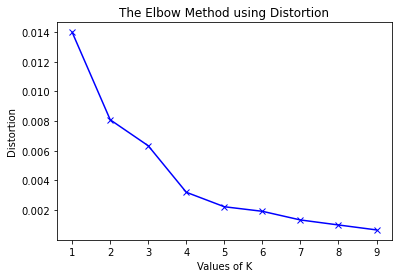

In [38]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

####  b) Using the different values of Inertia:

In [39]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 0.008117128410503984
2 : 0.003327534528016622
3 : 0.0014452265560851419
4 : 0.0006880577054819481
5 : 0.0004298453920518315
6 : 0.0003471966341505484
7 : 0.0002298545854164541
8 : 0.00016933949129340544
9 : 8.617402986089854e-05


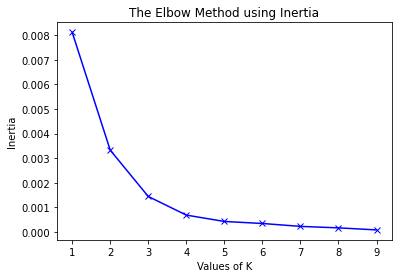

In [40]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [41]:
# from New York Data Set
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tea_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 0, 2, 1, 2, 2, 1, 1], dtype=int32)

https://stats.stackexchange.com/questions/89679/what-do-you-do-when-theres-no-elbow-point-for-kmeans-clustering

Let's create a new dataframe that includes the cluster label as well as the frequencies of the tea related venues for each neighborhood.

In [ ]:
# tea_grouped['Cluster Labels'] = 

# feature_file_df['RESULT'] = RESULT_df['RESULT'].values

In [42]:
# add clustering labels to the df
tea_grouped.insert(0, 'Cluster Labels', kmeans.labels_)#, allow_duplicates=True)

tea_merged = neighborhoods

# merge rosario_grouped with toronto_data to add latitude/longitude for each neighborhood
tea_merged = tea_merged.join(tea_grouped.set_index('Neighborhood'), on='Neighborhood')

Index(['PostalCode', 'City', 'Neighborhood', 'Latitude', 'Longitude',
       'Cluster Labels', 'Breakfast Spot', 'Tea Room', 'Creperie'],
      dtype='object')

In [43]:
tea_merged

,PostalCode,City,Neighborhood,Latitude,Longitude,Cluster Labels,Breakfast Spot,Tea Room,Creperie
0,V5K,Vancouver,North Hastings-Sunrise,49.283277,-123.043293,2,0.000000,0.00,0.0
1,V5L,Vancouver,North Grandview-Woodland,49.279853,-123.068277,1,0.030000,0.00,0.0
2,V5M,Vancouver,South Hastings-Sunrise / North Renfrew-Colling...,49.265358,-123.049119,1,0.020833,0.00,0.0
3,V5N,Vancouver,South Grandview-Woodland / NE Kensington-Cedar...,49.259254,-123.072063,2,0.000000,0.00,0.0
4,V5P,Vancouver,SE Kensington-Cedar Cottage / Victoria-Fraserview,49.230668,-123.071843,2,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...
26,V6S,Vancouver,NW Dunbar-Southlands / Chaldecutt / South Univ...,49.251210,-123.225418,2,0.000000,0.00,0.0
27,V6T,Vancouver,UBC,49.271268,-123.239269,2,0.000000,0.00,0.0
28,V6Z,Vancouver,SW Downtown,49.275885,-123.131725,0,0.000000,0.01,0.0
29,V7X,Vancouver,Bentall Centre,49.285967,-123.119531,0,0.010000,0.01,0.0


In [45]:
# Assign colors to the different Cluster Labels and replace with these new values the column named 'MarkerColor'
labels = list(tea_merged['Cluster Labels'])

marker_color = []

for label in labels:
    if label == 0:
        marker_color.append('red')
    elif label == 1:
        marker_color.append('blue')
    elif label == 2:
        marker_color.append('green')
    elif label == 3:
        marker_color.append('orange')
#     elif label == 4:
#         marker_color.append('purple')
#     elif label == 5:
#         marker_color.append('darkblue')
#     elif label == 6:
#         marker_color.append('darkgreen') 
        
tea_merged['MarkerColor'] = marker_color
tea_merged.head()

,PostalCode,City,Neighborhood,Latitude,Longitude,Cluster Labels,Breakfast Spot,Tea Room,Creperie,MarkerColor
0,V5K,Vancouver,North Hastings-Sunrise,49.283277,-123.043293,2,0.000000,0.0,0.0,green
1,V5L,Vancouver,North Grandview-Woodland,49.279853,-123.068277,1,0.030000,0.0,0.0,blue
2,V5M,Vancouver,South Hastings-Sunrise / North Renfrew-Colling...,49.265358,-123.049119,1,0.020833,0.0,0.0,blue
3,V5N,Vancouver,South Grandview-Woodland / NE Kensington-Cedar...,49.259254,-123.072063,2,0.000000,0.0,0.0,green
4,V5P,Vancouver,SE Kensington-Cedar Cottage / Victoria-Fraserview,49.230668,-123.071843,2,0.000000,0.0,0.0,green


In [46]:
# create map of Vancouver showing clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood, markercolor in zip(tea_merged['Latitude'],
                                               tea_merged['Longitude'],
                                               tea_merged['Neighborhood'],
                                               tea_merged['MarkerColor']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=markercolor,
        fill=True,
        fill_color=markercolor,
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)

map_clusters

https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

### Examine clusters

In [47]:
tea_merged.head()

,PostalCode,City,Neighborhood,Latitude,Longitude,Cluster Labels,Breakfast Spot,Tea Room,Creperie,MarkerColor
0,V5K,Vancouver,North Hastings-Sunrise,49.283277,-123.043293,2,0.000000,0.0,0.0,green
1,V5L,Vancouver,North Grandview-Woodland,49.279853,-123.068277,1,0.030000,0.0,0.0,blue
2,V5M,Vancouver,South Hastings-Sunrise / North Renfrew-Colling...,49.265358,-123.049119,1,0.020833,0.0,0.0,blue
3,V5N,Vancouver,South Grandview-Woodland / NE Kensington-Cedar...,49.259254,-123.072063,2,0.000000,0.0,0.0,green
4,V5P,Vancouver,SE Kensington-Cedar Cottage / Victoria-Fraserview,49.230668,-123.071843,2,0.000000,0.0,0.0,green


In [50]:
# create subdf
sub_tea_merged = tea_merged[['Cluster Labels', 'Breakfast Spot', 'Tea Room', 'Creperie']]
# use df.melt to rearrange data before plotting
data = sub_tea_merged.melt('Cluster Labels', var_name='Shop', value_name='Frequencies')

Text(0.5, 1.0, 'Average Number of Tea & Pastries Shops per Cluster')

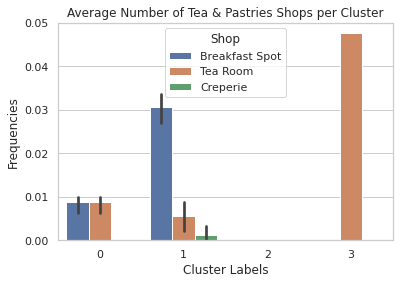

In [51]:
# avg number tea shops vs cluster
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Cluster Labels", y="Frequencies", hue="Shop", data=data)
ax.set_title("Average Number of Tea & Pastries Shops per Cluster")

# ax=sns.barplot(x='date', y='b', hue='a', data=data)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

There are no "Tea & Pastries" shops in neighborhoods grouped in cluster 2.

Cluster number 1 is the cluster with more Breakfast Spots, followed by cluster 0.

There is only one Creperie (in cluster 1), so this type of shop wouldn't be big competitors. @@@@@@@@@@@@@

Cluster 3 has five times more Tea Rooms than cluster 0, and the difference is even bigger with cluster 1.  

Let's see how many neighborhoods are there in each cluster:

In [ ]:
# create a sub dataframe with only 'Neighborhood', 'Cluster Labels', 'Yoga Studio' columns in it


In [53]:
# create a sub dataframe with only 'Neighborhood', 'Cluster Labels', ''Breakfast Spot', 'Tea Room' and 'Creperie' columns in it
neighborhoods_cluster = tea_merged[['Neighborhood', 'Cluster Labels', 'Breakfast Spot', 'Tea Room', 'Creperie']]
# group by cluster label and count the number of neighborhoods in each cluster
neighborhoods_per_cluster = neighborhoods_cluster.groupby('Cluster Labels')['Neighborhood'].count().to_frame()
neighborhoods_per_cluster.reset_index(inplace=True)
neighborhoods_per_cluster

,Cluster Labels,Neighborhood
0,0,8
1,1,9
2,2,13
3,3,1


Text(0.5, 1.0, 'Number of Neighborhoods per Cluster')

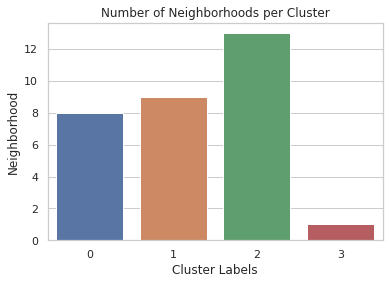

In [61]:
# plot number of neighborhoods vs cluster
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Cluster Labels", y="Neighborhood", data=neighborhoods_per_cluster)
ax.set_title("Number of Neighborhoods per Cluster")

The plots show that the Tea Rooms from cluster 3 are concentrated in a small area of the city &rarr; possible spots?

Cluster 2 has the highest number of neighborhoods and no clusters &rarr; maybe no demand?

The obvious clusters are 0 and 1, evaluate this.

In [54]:
tea_merged[tea_merged['Cluster Labels'] == 3]

,PostalCode,City,Neighborhood,Latitude,Longitude,Cluster Labels,Breakfast Spot,Tea Room,Creperie,MarkerColor
22,V6M,Vancouver,South Shaughnessy / NW Oakridge / NE Kerrisdal...,49.236303,-123.147141,3,0.0,0.047619,0.0,orange


In [57]:
vancouver_venues[(vancouver_venues['Venue Category'] == 'Tea Room')]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
410,East Mount Pleasant,49.264724,-123.092574,La petite cuillère,49.263533,-123.099900,Tea Room
523,West Kensington-Cedar Cottage / NE Riley Park-...,49.251565,-123.092962,Cultivate,49.252521,-123.101209,Tea Room
687,West Mount Pleasant / West Riley Park-Little M...,49.252015,-123.110748,Cultivate,49.252521,-123.101209,Tea Room
902,Strathcona / Chinatown / Downtown Eastside,49.281138,-123.095425,Treasure Green Tea Company,49.278557,-123.098545,Tea Room
1004,NE Downtown / Gastown / Harbour Centre / Inter...,49.280718,-123.114169,DAVIDsTEA,49.283808,-123.117051,Tea Room
...,...,...,...,...,...,...,...
1691,South Shaughnessy / NW Oakridge / NE Kerrisdal...,49.236303,-123.147141,Secret Garden Tea Company,49.235970,-123.155637,Tea Room
1713,South Shaughnessy / NW Oakridge / NE Kerrisdal...,49.236303,-123.147141,Adonia Kerrisdale Tea House,49.234635,-123.153653,Tea Room
1905,SW Downtown,49.275885,-123.131725,Granville Island Tea Company,49.272353,-123.134911,Tea Room
1990,Bentall Centre,49.285967,-123.119531,DAVIDsTEA,49.283808,-123.117051,Tea Room


In [60]:
neighborhoods.loc[(neighborhoods[neighborhoods['PostalCode'] == 'V6M']).index,'Neighborhood']

22    South Shaughnessy / NW Oakridge / NE Kerrisdal...
Name: Neighborhood, dtype: object

South Shaughnessy / NW Oakridge / NE Kerrisdale / SE Arbutus Ridge

# &rarr; Explore areas of Vancouver in order to find a good spot to open a "Tea & Pastries" shop.

Consider:
- Areas highly visited by turists
- City demographic diversity
- Areas with no venues like this







READ about South Shaughnessy / NW Oakridge / NE Kerrisdale / SE Arbutus Ridge &rarr; may be a good idea to open a shop there since there is high demand.

https://en.wikipedia.org/wiki/Shaughnessy,_Vancouver

https://en.wikipedia.org/wiki/Oakridge,_Vancouver

https://en.wikipedia.org/wiki/Kerrisdale

https://en.wikipedia.org/wiki/Arbutus_Ridge



In [324]:
cluster_0 = tea_merged.loc[tea_merged['Cluster Labels'] == 0,
                           tea_merged.columns[[1] + list(range(5, tea_merged.shape[1]))]]
cluster_0

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,MarkerColor
7,Vancouver,0,Breakfast Spot,Tea Room,Creperie,red
13,Vancouver,0,Breakfast Spot,Tea Room,Creperie,red
15,Vancouver,0,Breakfast Spot,Tea Room,Creperie,red
16,Vancouver,0,Breakfast Spot,Tea Room,Creperie,red
20,Vancouver,0,Breakfast Spot,Tea Room,Creperie,red
28,Vancouver,0,Tea Room,Breakfast Spot,Creperie,red
29,Vancouver,0,Breakfast Spot,Tea Room,Creperie,red
30,Vancouver,0,Breakfast Spot,Tea Room,Creperie,red


In [325]:
# find the mode for each of the first 3 columns
n = 0
for column in cluster_0.columns[1:]:
    print(cluster_0[column].mode())
    n += 1
    if n == 3:
        break

0    0
dtype: int32
0    Breakfast Spot
dtype: object
0    Tea Room
dtype: object


In [327]:
cluster_1 = tea_merged.loc[tea_merged['Cluster Labels'] == 1,
                           tea_merged.columns[[1] + list(range(5, tea_merged.shape[1]))]]
cluster_1

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,MarkerColor
1,Vancouver,1,Breakfast Spot,Tea Room,Creperie,blue
2,Vancouver,1,Breakfast Spot,Tea Room,Creperie,blue
8,Vancouver,1,Breakfast Spot,Tea Room,Creperie,blue
11,Vancouver,1,Breakfast Spot,Tea Room,Creperie,blue
12,Vancouver,1,Breakfast Spot,Tea Room,Creperie,blue
14,Vancouver,1,Breakfast Spot,Tea Room,Creperie,blue
17,Vancouver,1,Breakfast Spot,Tea Room,Creperie,blue
18,Vancouver,1,Breakfast Spot,Tea Room,Creperie,blue
19,Vancouver,1,Breakfast Spot,Tea Room,Creperie,blue


In [328]:
# find the mode for each of the first 3 columns
n = 0
for column in cluster_1.columns[1:]:
    print(cluster_1[column].mode())
    n += 1
    if n == 3:
        break

0    1
dtype: int32
0    Breakfast Spot
dtype: object
0    Tea Room
dtype: object
